![example](images/director_shot.jpeg)

# Microsoft Movie Analysis

**Author:** Cindy Reiner
***

## Overview

A one-paragraph overview of the project, including the business problem, data, methods, results and recommendations.

## Business Problem

As a company who is hoping to break into a new area, Microsoft will need to first focus on the questions most relevent to getting started. Among the initial analysis needed are the questions of budget, genre of movie, and writer/director. These all need to be decided in the first steps of creating/planning the first movie. I believe we should focus on starting small with a high return on investment so the company can grow to a point where it can take more risks. 

## Data Understanding

Describe the data being used for this project.
***
Questions to consider:
* Where did the data come from, and how do they relate to the data analysis questions?
* What do the data represent? Who is in the sample and what variables are included?
* What is the target variable?
* What are the properties of the variables you intend to use?
***

This project uses two datasets. The first one was obtained from kaggle.com and contains 5000 movies from The Movie Database. It includes movie titles, budgets, revenues, vote averages and numbers, genres, languages, keywords and release dates. For this dataset, I am mostly interested in the budgets, revenues and genres of the movies to determine what budgets and genres have the highest return on investment.

The second dataset is a combination of several datasets from IMDB and one from Box Office Mojo. The IMDB datasets include movie titles, release dates, genres, average ratings, writers and directors. The Box Office Mojo dataset includes movie titles, release years, and domestic gross. In this dataset, I will use the movie genres, domestic gross, ratings, writers, and directors.

In [2]:
# Import standard packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")
%matplotlib inline
sns.set_style('darkgrid')
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [3]:
# Import data
tmdb_df = pd.read_csv('data/tmdb_5000_movies.csv.zip')
movie_gross_df = pd.read_csv('data/zippedData/bom.movie_gross.csv.gz', compression = 'gzip')
title_basics_df = pd.read_csv('data/zippedData/imdb.title.basics.csv.gz', compression = 'gzip')
title_rating_df = pd.read_csv('data/zippedData/imdb.title.ratings.csv.gz', compression = 'gzip')
title_crew_df = pd.read_csv('data/zippedData/imdb.title.crew.csv.gz', compression = 'gzip')
name_basics_df = pd.read_csv('data/zippedData/imdb.name.basics.csv.gz', compression = 'gzip')

In [4]:
tmdb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
budget                  4803 non-null int64
genres                  4803 non-null object
homepage                1712 non-null object
id                      4803 non-null int64
keywords                4803 non-null object
original_language       4803 non-null object
original_title          4803 non-null object
overview                4800 non-null object
popularity              4803 non-null float64
production_companies    4803 non-null object
production_countries    4803 non-null object
release_date            4802 non-null object
revenue                 4803 non-null int64
runtime                 4801 non-null float64
spoken_languages        4803 non-null object
status                  4803 non-null object
tagline                 3959 non-null object
title                   4803 non-null object
vote_average            4803 non-null float64
vote_count              4803 non-null 

In [5]:
movie_gross_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
title             3387 non-null object
studio            3382 non-null object
domestic_gross    3359 non-null float64
foreign_gross     2037 non-null object
year              3387 non-null int64
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [6]:
title_basics_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
tconst             146144 non-null object
primary_title      146144 non-null object
original_title     146123 non-null object
start_year         146144 non-null int64
runtime_minutes    114405 non-null float64
genres             140736 non-null object
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [7]:
title_rating_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
tconst           73856 non-null object
averagerating    73856 non-null float64
numvotes         73856 non-null int64
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


In [8]:
title_crew_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 3 columns):
tconst       146144 non-null object
directors    140417 non-null object
writers      110261 non-null object
dtypes: object(3)
memory usage: 3.3+ MB


In [9]:
name_basics_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 606648 entries, 0 to 606647
Data columns (total 6 columns):
nconst                606648 non-null object
primary_name          606648 non-null object
birth_year            82736 non-null float64
death_year            6783 non-null float64
primary_profession    555308 non-null object
known_for_titles      576444 non-null object
dtypes: float64(2), object(4)
memory usage: 27.8+ MB


### The Movie Database (TMDB)
This dataset includes movies with release dates from 1916-2017 along with their budget, revenue, genres, and popularity.

In [10]:
tmdb_df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.44,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.00,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.20,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.08,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.00,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.90,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.38,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.00,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.30,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.31,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.00,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.60,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.93,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.00,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.10,2124


In [11]:

tmdb_df['release_date'] =  pd.to_datetime(tmdb_df['release_date'])
tmdb_df['release_date'].describe()

count                    4802
unique                   3280
top       2006-01-01 00:00:00
freq                       10
first     1916-09-04 00:00:00
last      2017-02-03 00:00:00
Name: release_date, dtype: object

In [12]:
tmdb_df['budget'].describe()

count        4803.00
mean     29045039.88
std      40722391.26
min             0.00
25%        790000.00
50%      15000000.00
75%      40000000.00
max     380000000.00
Name: budget, dtype: float64

In [13]:
tmdb_df['revenue'].describe()

count         4803.00
mean      82260638.65
std      162857100.94
min              0.00
25%              0.00
50%       19170001.00
75%       92917187.00
max     2787965087.00
Name: revenue, dtype: float64

In [14]:
tmdb_df['popularity'].describe()

count   4803.00
mean      21.49
std       31.82
min        0.00
25%        4.67
50%       12.92
75%       28.31
max      875.58
Name: popularity, dtype: float64

### Movie Gross
This dataset includes movies from 2010-2018 along with their domestic and foreign gross profits.

In [15]:
movie_gross_df.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.00,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.00,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.00,664300000,2010
3,Inception,WB,292600000.00,535700000,2010
4,Shrek Forever After,P/DW,238700000.00,513900000,2010


In [16]:
movie_gross_df['year'].describe()

count   3387.00
mean    2013.96
std        2.48
min     2010.00
25%     2012.00
50%     2014.00
75%     2016.00
max     2018.00
Name: year, dtype: float64

In [17]:
movie_gross_df['domestic_gross'].describe()

count        3359.00
mean     28745845.07
std      66982498.24
min           100.00
25%        120000.00
50%       1400000.00
75%      27900000.00
max     936700000.00
Name: domestic_gross, dtype: float64

In [18]:
# this column will require cleaning to use- it's dtype is object with some containing commas or null values
movie_gross_df['foreign_gross'].describe()

count        2037
unique       1204
top       1200000
freq           23
Name: foreign_gross, dtype: object

### IMDB Datasets
There are four IMDB datasets that will be joined together for this analysis. The first is the basics, which includes title, genres and year for movies released in 2010 and later. The ratings data set contains ratings and number of ratings. The title crew data has unique IDs for both movies and writer and director names to provide a link between the basics dataset and the names data, which contains the names of writers and directors as well as their unique IDs.

In [19]:
title_basics_df.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.00,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.00,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.00,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,nan,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.00,"Comedy,Drama,Fantasy"


In [20]:
title_basics_df['start_year'].describe()

count   146144.00
mean      2014.62
std          2.73
min       2010.00
25%       2012.00
50%       2015.00
75%       2017.00
max       2115.00
Name: start_year, dtype: float64

In [21]:
title_rating_df.head()

,tconst,averagerating,numvotes
0,tt10356526,8.30,31
1,tt10384606,8.90,559
2,tt1042974,6.40,20
3,tt1043726,4.20,50352
4,tt1060240,6.50,21


In [22]:
title_crew_df.head()

,tconst,directors,writers
0,tt0285252,nm0899854,nm0899854
1,tt0438973,NaN,"nm0175726,nm1802864"
2,tt0462036,nm1940585,nm1940585
3,tt0835418,nm0151540,"nm0310087,nm0841532"
4,tt0878654,"nm0089502,nm2291498,nm2292011",nm0284943


In [23]:
name_basics_df.head()

,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles
0,nm0061671,Mary Ellen Bauder,nan,nan,"miscellaneous,production_manager,producer","tt0837562,tt2398241,tt0844471,tt0118553"
1,nm0061865,Joseph Bauer,nan,nan,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940"
2,nm0062070,Bruce Baum,nan,nan,"miscellaneous,actor,writer","tt1470654,tt0363631,tt0104030,tt0102898"
3,nm0062195,Axel Baumann,nan,nan,"camera_department,cinematographer,art_department","tt0114371,tt2004304,tt1618448,tt1224387"
4,nm0062798,Pete Baxter,nan,nan,"production_designer,art_department,set_decorator","tt0452644,tt0452692,tt3458030,tt2178256"


## Data Preparation

Describe and justify the process for preparing the data for analysis.

***
Questions to consider:
* Were there variables you dropped or created?
* How did you address missing values or outliers?
* Why are these choices appropriate given the data and the business problem?
***

### TMDB dataset
##### Data Cleaning
To prepare the tmdb dataset for analysis, I dropped unneeded columns. I plan to use this data to analyze movie budgets, revenue, and genres. To eliminate issues of of inflation and changing public interests, I also limited the data to movies that were released in 2000 or later. Finally, I dropped films without budget and revenue data.

In [24]:
#drop columns I know I won't be using
tmdb_df = tmdb_df.drop(columns = ['homepage', 'original_title', 'status', 'tagline', 'original_language', 'spoken_languages', 'overview', 'production_countries'])


In [25]:
#limit data movies made since 2000
tmdb_df = tmdb_df.loc[tmdb_df['release_date'] > '1999-12-31']

In [26]:
#drop films without budget data
tmdb_df = tmdb_df.loc[tmdb_df['budget'] != 0]
#remove films without revenue data
tmdb_df = tmdb_df.loc[tmdb_df['revenue'] != 0]

In [27]:
tmdb_df.head()

,budget,genres,id,keywords,popularity,production_companies,release_date,revenue,runtime,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",150.44,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",2009-12-10,2787965087,162.00,Avatar,7.20,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",139.08,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",2007-05-19,961000000,169.00,Pirates of the Caribbean: At World's End,6.90,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",107.38,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",2015-10-26,880674609,148.00,Spectre,6.30,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",112.31,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",2012-07-16,1084939099,165.00,The Dark Knight Rises,7.60,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",43.93,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",2012-03-07,284139100,132.00,John Carter,6.10,2124


### Feature Engineering

In [28]:
#add column for ROI
tmdb_df['roi'] = tmdb_df['revenue'] / tmdb_df['budget']

In [29]:
#reorder columns to make them easier to use
tmdb_df = tmdb_df[['budget', 'revenue', 'roi', 'title', 'release_date', 'genres', 'keywords', 'vote_average', 'vote_count', 'popularity', 'production_companies', 'runtime', 'id']]

The genres and keyword columns look like dictionaries, but turned out to be strings that look like dictionaries. This function will first convert the strings to dictionaries, then extract the values for the 'name' key into a list of genres or keywords.

In [30]:
#function that will turn each string/dictionary column into lists
import ast
def str_dict_to_list(column, dataframe) :
    '''
    returns the column as a list of the values for the 'name' key
    
    Parameters:
        column: str
            column that is a string that looks like a dictionary and has a 'name' key
        dataframe 
            dataframe the contains a column fitting the above description
    Returns:
         dataframe 
             same dataframe with string/dictionary column as list of values for the 'name' keys
    '''
    names_list = []
    for row in dataframe.index:
        # first need to convert the strings to dictionarys!
        str_to_dict = ast.literal_eval(dataframe[column][row])
        #create list of values from key "name"
        names_list = [name.get("name") for name in str_to_dict]
        #replace the column value with the new list
        dataframe[column][row] = names_list
    return dataframe

In [31]:
# call function on genre, keyword, and production company columns of tmdb_df
str_dict_to_list('genres', tmdb_df)
str_dict_to_list('keywords', tmdb_df)
str_dict_to_list('production_companies', tmdb_df)

,budget,revenue,roi,title,release_date,genres,keywords,vote_average,vote_count,popularity,production_companies,runtime,id
0,237000000,2787965087,11.76,Avatar,2009-12-10,"[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...",7.20,11800,150.44,"[Ingenious Film Partners, Twentieth Century Fo...",162.00,19995
1,300000000,961000000,3.20,Pirates of the Caribbean: At World's End,2007-05-19,"[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...",6.90,4500,139.08,"[Walt Disney Pictures, Jerry Bruckheimer Films...",169.00,285
2,245000000,880674609,3.59,Spectre,2015-10-26,"[Action, Adventure, Crime]","[spy, based on novel, secret agent, sequel, mi...",6.30,4466,107.38,"[Columbia Pictures, Danjaq, B24]",148.00,206647
3,250000000,1084939099,4.34,The Dark Knight Rises,2012-07-16,"[Action, Crime, Drama, Thriller]","[dc comics, crime fighter, terrorist, secret i...",7.60,9106,112.31,"[Legendary Pictures, Warner Bros., DC Entertai...",165.00,49026
4,260000000,284139100,1.09,John Carter,2012-03-07,"[Action, Adventure, Science Fiction]","[based on novel, mars, medallion, space travel...",6.10,2124,43.93,[Walt Disney Pictures],132.00,49529
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4742,65000,28575078,439.62,Super Size Me,2004-01-17,"[Documentary, Comedy, Drama]","[experiment, health, junk food, food industry,...",6.60,506,10.40,[Kathbur Pictures],100.00,9372
4752,65000,416498,6.41,Tiny Furniture,2010-11-12,"[Romance, Comedy, Drama]","[sister sister relationship, male female relat...",5.60,59,2.38,[Tiny Ponies],99.00,47607
4758,4000000,600896,0.15,The Signal,2014-03-15,"[Thriller, Science Fiction]","[hacker, supernatural powers, road trip, indep...",5.80,631,27.66,"[Automatik Entertainment, Low Spark Films, Sig...",95.00,242095
4772,31192,10000,0.32,Down Terrace,2009-09-01,"[Drama, Action, Comedy]","[murder, dark comedy, crime family]",6.30,26,1.33,[],89.00,42151


To look at the number of movies in each genre, I need the number of movies in each genre in a dataframe.

In [44]:
#function that will take a dataframe with a genres column 
#and return a series with genres and number of movies in that genre
def creategenreinfoseries(dataframe):
    '''
    return a series with the genres and number of rows containing the genre
    
    Parameters:
        dataframe 
            dataframe that contains a 'genres' column 
    Returns:
         series 
             index is the genre names, column is number of rows/movies with that genre
    '''
    df = fillgenres(creategenrecols(genrelistfromDF(dataframe), genreDF(dataframe)), genrelistfromDF(dataframe))
    return dropandsum(df)

def dropandsum(dataframe):
    #drops the 'genres' column used to fill the dataframe, then sums the rows for each genre column
    dataframe.drop(columns = ['genres'], inplace = True)
    return dataframe.sum()

def fillgenres(dataframe, _list):
    #fills in a dataframe (will use the one created in creategencols()) based on the list in it's ['genres'] column
    for row in dataframe.index:
        for genre in _list:
            if genre in dataframe['genres'][row]:
                dataframe[genre][row]  = 1
    return dataframe

def creategenrecols(_list, dataframe):
    #create columns from a list (will use the one created with genrelistfromDF()) 
    #in a dataframe (will use one created with genreDF())
    for col in _list:
        dataframe[col] = 0
    return dataframe
    
def genrelistfromDF(dataframe):
    #create and return a list of genres present in the argument
    genre_list = sorted(set(dataframe['genres'].sum()))
    return genre_list

    
def genreDF(dataframe):
    #create and return a dataframe from the genres series of the argument
    genre_df = pd.DataFrame(dataframe['genres'])
    return genre_df

## Data Modeling
Describe and justify the process for analyzing or modeling the data.

***
Questions to consider:
* How did you analyze or model the data?
* How did you iterate on your initial approach to make it better?
* Why are these choices appropriate given the data and the business problem?
***

### Budget
To make a budget recommendation, I examined the relationship between return on investment (ROI) and budget. I first looked at a scatter plot of ROI vs Budget to see what ROI would be considered to be high, and what budget those high ROI movies have. There are some outliers in the ROI data, with a very high ROI, so I also plotted a zoomed in version to see the transition between high budget/low ROI and low budget/high ROI.


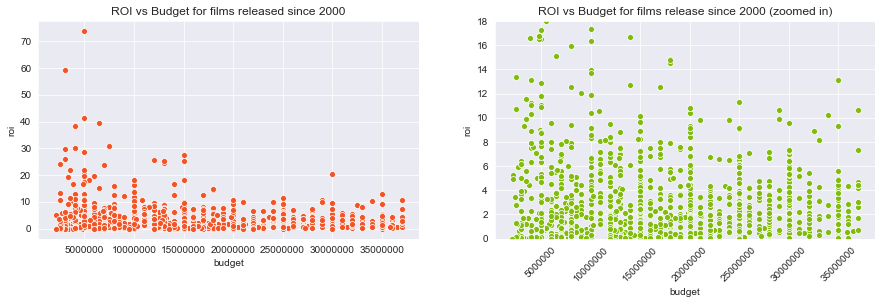

In [57]:
# Plot ROI vs Budgets
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))

plt.xticks(rotation = 45)
    
ax[0].ticklabel_format(style='plain', axis='x')
ax[1].ticklabel_format(style='plain', axis='x')

ax[0].set_title('ROI vs Budget for films released since 2000')
ax[0].set_ylabel('ROI (return on investment)')
ax[0].set_xlabel('Budget in US$')

ax[1].set_title('ROI vs Budget for films release since 2000 (zoomed in)')
ax[1].set_ylabel('ROI (return on investment)')
ax[1].set_xlabel('Budget in US$')

ax[1].set_ylim(0, 18)

budget = tmdb_df['budget']
roi = tmdb_df['roi']

sns.scatterplot(x = tmdb_df['budget'], y = tmdb_df['roi'], ax=ax[0], color = '#F35426')
sns.scatterplot(x = budget, y = roi, ax=ax[1], color = '#81BC0D')

#plt.savefig("./images/roivbudget.png", dpi=150)
plt.show()

This shows that lower budget movies tend to have the highest ROI. Based on these graphs,I decided on an ROI of 6 as a mid point to separate the high ROI movies from the low ROI movies. It also looks like extremely low budget movies will skew any budget analysis, so I will next look at the budget distributions of the high and low ROI movies that have a budget over $2 million.

In [34]:
# limit data to budgets over $2 million
tmdb_df = tmdb_df[tmdb_df['budget'] > 2000000]

In [35]:
#add column to indicate high or low ROI
tmdb_df.loc[tmdb_df['roi']<6, 'roi_type'] = 'low'
tmdb_df.loc[tmdb_df['roi']>=6, 'roi_type'] = 'high'

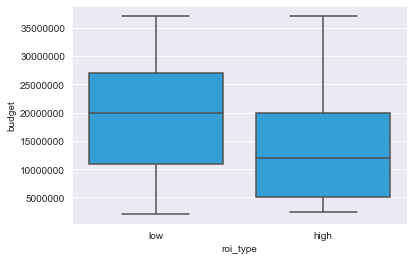

In [55]:
# use a box plot to look at the budget distribution of the high and low roi datasets
plt.ticklabel_format(style='plain', axis='y')
sns.boxplot(y = tmdb_df['budget'], x=tmdb_df['roi_type'], color = '#1AA7F0')
plt.show()

In [37]:
tmdb_df[['roi_type', 'budget']].groupby(['roi_type']).describe()

budget                                                             \
           count        mean         std        min         25%         50%   
roi_type                                                                      
high      241.00 31986971.06 40229509.00 2500000.00  7500000.00 15000000.00   
low      1923.00 51415948.79 48900511.19 2100000.00 18000000.00 35000000.00   

                                   
                 75%          max  
roi_type                           
high     37000000.00 237000000.00  
low      69500000.00 380000000.00

Movies with a high ROI have lower budgets overall, though there is considerable overlap. For the purposes of Microsoft's first movie project, I would recommend keeping in the inner quartile range of of the high ROI data, \\$8-37 million. For the rest of the analysis for the TMDB data, I will compare lower budget movies (\\$37 million and less) to see what differences there are between those that have a high ROI and those that have a low ROI.

In [38]:
# limiting data to movies with budget equal to or below $37 million
tmdb_df = tmdb_df[tmdb_df['budget']<=37000000]

### Genre
To answer the question of what type of movie Microsoft should make, I compared the number of movies of each genre between the low and high ROI movies. 

In [45]:
high_roi = creategenreinfoseries(tmdb_df[tmdb_df['roi_type'] == 'high'])
low_roi = creategenreinfoseries(tmdb_df[tmdb_df['roi_type'] == 'low'])
high_roi = pd.DataFrame(high_roi, columns = ['number_of_movies'])
low_roi = pd.DataFrame(low_roi, columns =['number_of_movies'])
genre_numbers = high_roi.reset_index().merge(low_roi.reset_index(), on = 'index', suffixes = ('_high_roi', '_low_roi'))
genre_numbers['percent_high_roi'] = genre_numbers['number_of_movies_high_roi']/(genre_numbers['number_of_movies_high_roi']+genre_numbers['number_of_movies_low_roi'])

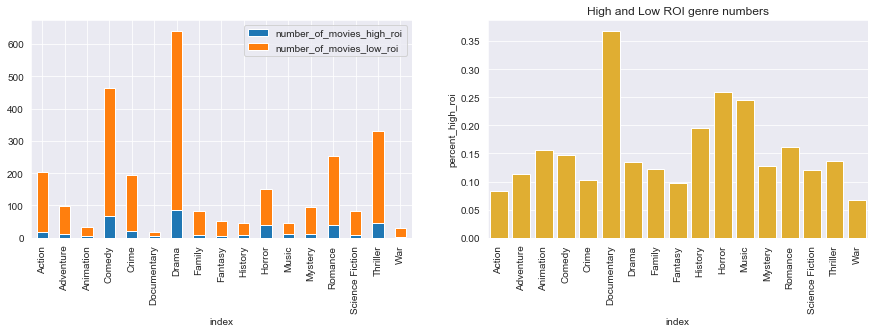

In [70]:
fig, ax = plt.subplots(ncols = 2, nrows = 1, figsize = (15,4))
plt.title("High and Low ROI genre numbers")
plt.xlabel("Genre")
plt.ylabel("Number of Movies")
plt.xticks(rotation=90)
genre_numbers.reset_index().plot(
    x="index", y=["number_of_movies_high_roi", "number_of_movies_low_roi"], kind="bar", stacked = True, ax = ax[0]
)
sns.barplot(data = genre_numbers.reset_index(), x = 'index', y = 'percent_high_roi', color = '#FDBA15', ax = ax[1])
plt.show()

The genres, Documentary, History, Horror and Music, are the mostly likely to be in the high roi group for this budget range. 

I first looked at whether high roi movies are also more popular on the TMDB website, by looking at the 

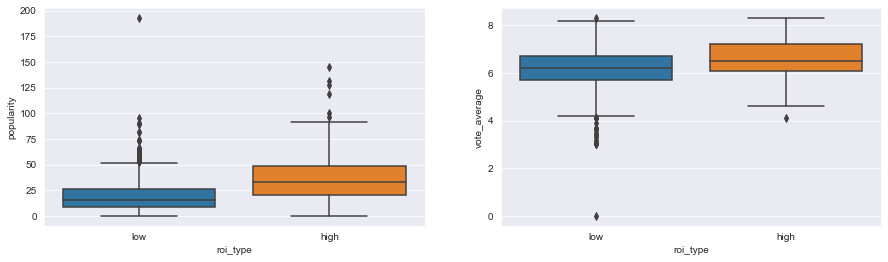

In [95]:
tmdb_df[['roi_type', 'popularity']].groupby(['roi_type']).describe()
fig, ax = plt.subplots(nrows=1, ncols=2, figsize = (15, 4))

plt.ticklabel_format(style='plain', axis='y')
sns.boxplot(y = tmdb_df['popularity'], x=tmdb_df['roi_type'], ax=ax[0])
sns.boxplot(y = tmdb_df['vote_average'], x=tmdb_df['roi_type'], ax = ax[1])
plt.show()

## Evaluation
Evaluate how well your work solves the stated business problem.

***
Questions to consider:
* How do you interpret the results?
* How well does your model fit your data? How much better is this than your baseline model?
* How confident are you that your results would generalize beyond the data you have?
* How confident are you that this model would benefit the business if put into use?
***

## Conclusions
Provide your conclusions about the work you've done, including any limitations or next steps.

***
Questions to consider:
* What would you recommend the business do as a result of this work?
* What are some reasons why your analysis might not fully solve the business problem?
* What else could you do in the future to improve this project?
***